# Análise de Dividendos Históricos para Manutenção de Portfólio de FIIs

## Objeivos

- Praticar análise de dados
- Obter insights para manutenção de portfólio de ativos com base na análise dos dividendos históricos
- Identificar ativos que potencialmente podem ser removidos do portfólio, ou diminuir a posição
- Identificar ativos que podem representar uma oportunidade de investimento dentro do portfólio

## Dados Históricos

**Os dados foram extraídos do histórico de dividendos de uma conta no MyProfit disponível em https://myprofitweb.com/**

In [105]:
import pandas as pd
dados = pd.read_csv('dividendos.csv', decimal=',', thousands='.', parse_dates=['Data pgto.','Data COM'], dayfirst=True)

limite_meses_relatorios = 12

#filtrando pela categoria configurada como Renda Variavel no MyProfitWeb
dados = dados[ dados['Minha Categoria'] == 'Renda Variavel' ]

#eliminando 2 ativos que não existem mais no portfólio, mas que são trazidos na massa de dados
dados = dados[ dados['Ativo'] != 'XPLG11' ]
dados = dados[ dados['Ativo'] != 'HSLG11' ]

#calculando diferença entre DY - YOC e criando nova coluna no DataFrame para posterior utilização
dados['YOC_DY'] = dados['DY'].str.replace(' %','').astype(float) - dados['YOC'].str.replace(' %','').astype(float)

#tratando valor por cota para posterior utilização
dados['VALOR_DY_COTA'] = dados['Valor por cota'].str.replace('R$ ','').str.replace(',','.').astype(float)

display(dados)

,Ativo,Minha Categoria,Recebido,Total investido,Total atual,Data pgto.,Data COM,YOC,DY,Cotas,Preço médio,Cotação,Valor por cota,YOC_DY,VALOR_DY_COTA
1,BCFF11,Renda Variavel,"R$ 21,71","R$ 3.217,53","R$ 2.812,00",2022-01-14,2022-01-07,0.67 %,0.77 %,40,"R$ 80,4383","R$ 70,30","R$ 0,54",0.10,0.54
2,KNRI11,Renda Variavel,"R$ 22,88","R$ 3.790,44","R$ 3.488,68",2022-01-14,2021-12-30,0.60 %,0.66 %,26,"R$ 145,7863","R$ 134,18","R$ 0,88",0.06,0.88
3,MXRF11,Renda Variavel,"R$ 16,83","R$ 1.952,38","R$ 1.871,87",2022-01-14,2021-12-30,0.86 %,0.90 %,187,"R$ 10,4406","R$ 10,01","R$ 0,09",0.04,0.09
4,RBFF11,Renda Variavel,"R$ 7,05","R$ 930,07","R$ 855,45",2022-01-14,2021-12-30,0.76 %,0.82 %,15,"R$ 62,0045","R$ 57,03","R$ 0,47",0.06,0.47
5,RBVA11,Renda Variavel,"R$ 7,28","R$ 860,42","R$ 819,92",2022-01-14,2021-12-30,0.85 %,0.89 %,8,"R$ 107,5523","R$ 102,49","R$ 0,91",0.04,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,KNRI11,Renda Variavel,"R$ 1,95","R$ 541,12","R$ 458,22",2020-04-15,2020-03-31,0.36 %,0.43 %,3,"R$ 180,3736","R$ 152,74","R$ 0,65",0.07,0.65
150,BCFF11,Renda Variavel,"R$ 1,06","R$ 212,95","R$ 196,90",2020-03-13,2020-03-06,0.50 %,0.54 %,2,"R$ 106,4750","R$ 98,45","R$ 0,53",0.04,0.53
151,KNRI11,Renda Variavel,"R$ 2,22","R$ 541,12","R$ 512,85",2020-03-13,2020-02-28,0.41 %,0.43 %,3,"R$ 180,3736","R$ 170,95","R$ 0,74",0.02,0.74
157,BCFF11,Renda Variavel,"R$ 1,14","R$ 212,95","R$ 202,34",2020-02-14,2020-02-07,0.54 %,0.56 %,2,"R$ 106,4750","R$ 101,17","R$ 0,57",0.02,0.57


## Dividendos Recebidos por ativo

**Começamos agrupando os dividendos recebidos por ativo, ordenados do maior pagador para o menor**
Importante considerar que nem todos os ativos irão possuir a mesma quantidade de cotas, então aqui só um panorama de distribuição por ativo

In [106]:
dados['Dividendos'] = dados['Recebido'].str.replace('R$ ','').str.replace(',','.').astype(float)
recebido_por_ativo = dados[['Ativo','Dividendos']].groupby('Ativo').sum().sort_values(by='Dividendos', ascending=False)

display(recebido_por_ativo)

,Dividendos
Ativo,
BCFF11,242.92
MXRF11,188.48
KNRI11,181.37
RBVA11,37.32
RBFF11,36.19


## Relação DY - YOC agrupadas por ativo nos últimos 12 meses

Ao calcular o Dividend Yield menos o Yield on Cost é possível, se o resultado for positivo, indica um aumento nos dividendos
ou uma queda na cotação do ativo, e dependendo de uma análise qualitativa no ativo que atender a esse cenário, pode valer a pena o aporte

**Para Calcular o DY do mês basta dividir o valor do dividendo pago por cota pelo valor da cotação e multiplicar por 100**

**Cenário 1 - Dividendo estável, e queda da cotação**
Se possuirmos 10 cotas do ativo ABC123 custando 100,00 cada uma, e mensalmente recebemos 1,00 em dividendos por cota, 
então nosso YOC é 1.00 (1,00 / 100,00) X 100.
Agora imaginemos que o valor da cota do ativo ABC123 caiu para 95,00, mas os dividendos permanecem os mesmos 1,00 por cota, agora passamos a ter
um DY maior que o YOC, a saber um DY de 1.05 (1,00 / 95,00) X 100 maior que o YOC de 1.00. Isso graças a queda da cotação de 
100,00 para 95,00.
Isso mostra um cenário favorável já que o que caiu foi a cotação do ativo, e não o dividendo.

**Cenário 2 - Cotação relativamente estável, e crescimento do dividendo**
Pensando no mesmo exemplo de Cenário 1, imaginemos que a cotação permaneceu em 100,00 e o dividendo cresceu para 1,10, 
nesse caso o DY também passa a ser maior que o YOC, o DY vale 1.10 (1,10 / 100,00) X 100.

Por esse motivo, abaixo os ativos estão sendo agrupados, considerando as distribuições dos ultimos 12 meses, 
calculando o percentual de ocorrências para cada ativo onde essa relação DY - YOC é positiva, e esses ativos 
com essa relação positiva são os que nos interessam, porque ou a cotação caiu e o dividendo é estável, ou a cotação
se manteve relativamente estável e o dividendo cresceu.


In [107]:
ativos = dados['Ativo'].unique()

relatorio_dy_yoc = []

for i, a in enumerate(ativos):    
    
    registros_ativo = dados[ dados['Ativo'] == a ][:limite_meses_relatorios]
    registros_positivos = registros_ativo[ registros_ativo['YOC_DY'] > 0.0 ]

    total_registros_ativo = len(registros_ativo)
    total_registros_positivos = len(registros_positivos)
    parcial_positivos = (total_registros_positivos / total_registros_ativo) * 100
    
    relatorio_dy_yoc.append({'Ativo':a, 'Registros':total_registros_ativo, 'Negativos':total_registros_positivos,'ParcialNegativos':round(parcial_positivos, 2)})

df_relatorio = pd.DataFrame(relatorio_dy_yoc).sort_values(by='ParcialNegativos', ascending=False)

display(df_relatorio)

,Ativo,Registros,Negativos,ParcialNegativos
1,KNRI11,12,12,100.00
3,RBFF11,7,7,100.00
4,RBVA11,7,5,71.43
0,BCFF11,12,8,66.67
2,MXRF11,12,8,66.67


## Distribuição de Dividendos para Ativos com relação DY - YOC positiva

Agora, filtrando apenas os ativos com relação DY - YOC positiva é exibido um gráfico de frequências dos valores de dividendos distribuidos nos últimos 12 meses, o ativo que possuir menos barras de frequencia no gráfico possui o dividendo mais estável, já que na distribuição de frequências não teve variações.

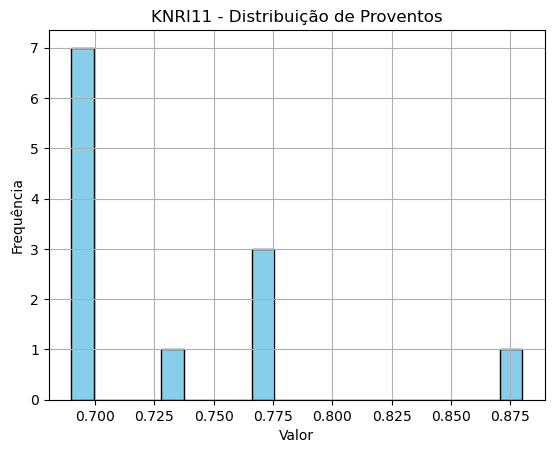

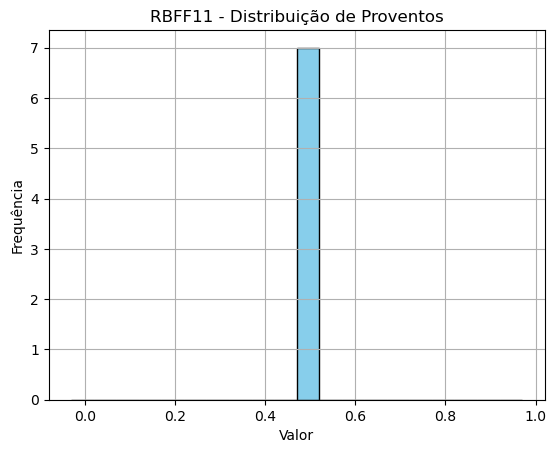

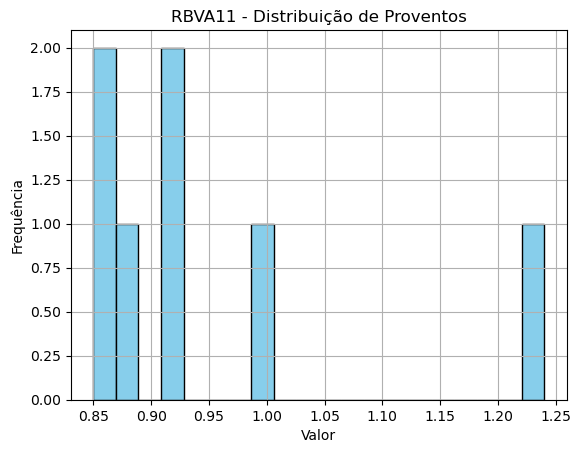

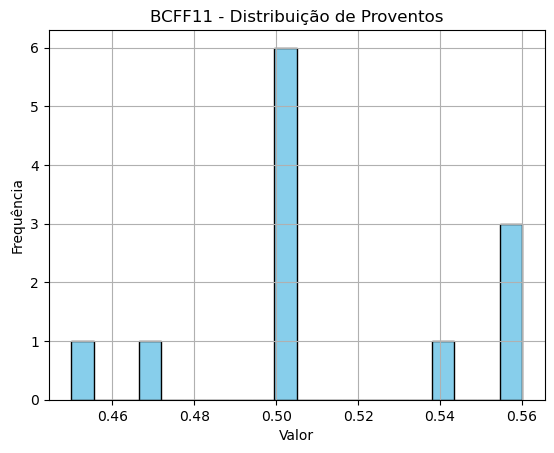

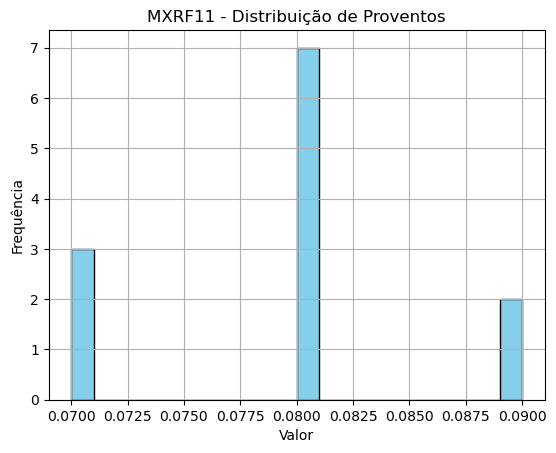

In [108]:
import matplotlib.pyplot as plt
ativos_relacao_positiva = df_relatorio[df_relatorio['ParcialNegativos'] > 0.0]
 
for a in ativos_relacao_positiva['Ativo'].unique():
    filtro_registros_ativo = dados['Ativo'] == a
    registros_ativo = dados[filtro_registros_ativo][:limite_meses_relatorios]

    plt.hist(registros_ativo['VALOR_DY_COTA'], bins=20, color='skyblue', edgecolor='black')
    plt.title(a + ' - Distribuição de Proventos')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.grid(True)

    plt.show()


## Distribuição de Dividendos para Ativos com relação DY - YOC negativa ou neutra

Agora precisamos examinar os ativos com relação negativa ou neutra, cenário que pode significar que a cotação do ativo aumentou mas 
o DY permaneceu estável

In [109]:
import matplotlib.pyplot as plt
ativos = df_relatorio[df_relatorio['ParcialNegativos'] <= 0.0]

for a in ativos['Ativo'].unique():
    filtro = dados['Ativo'] == a
    registros = dados[filtro][:limite_meses_relatorios]

    plt.hist(registros['VALOR_DY_COTA'], bins=20, color='skyblue', edgecolor='black')
    plt.title(a + ' - Distribuição de Proventos')
    plt.xlabel('Valor')
    plt.ylabel('Frequência')
    plt.grid(True)

    plt.show()
